In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
#Looading dataset
data=pd.read_csv("C:/Users/User/Documents/DATA ANALYST/Python/craigslist_vehicles.csv")
print(data.head(0))

Empty DataFrame
Columns: [Unnamed: 0, id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, county, state, lat, long, posting_date, removal_date]
Index: []

[0 rows x 28 columns]


In [11]:
# Convert 'posting_date' column to datetime format
data['posting_date'] = pd.to_datetime(data['posting_date'])

In [12]:
# Extract year and month from posting_date
data['year'] = data['posting_date'].dt.year
data['month'] = data['posting_date'].dt.month

In [13]:
# Group by region, year, and month to get count of listings
listings_by_region = data.groupby(['region', 'year', 'month']).size().reset_index(name='count')

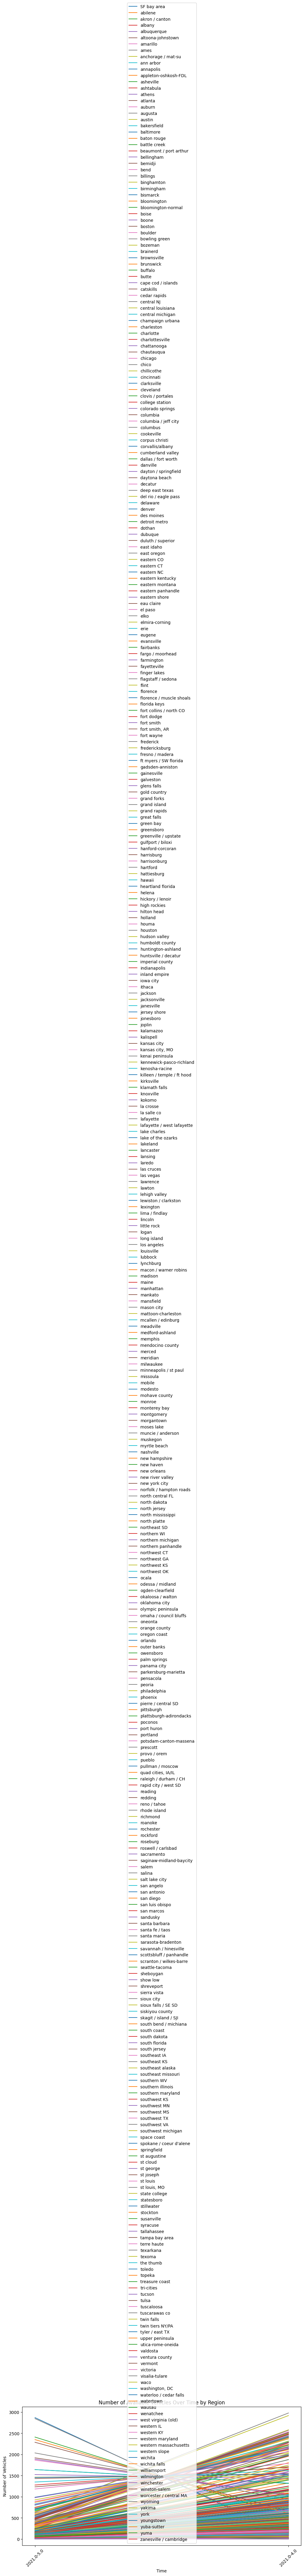

In [14]:
# Plot time-series chart for each region
plt.figure(figsize=(12, 6))
for region in listings_by_region['region'].unique():
    region_data = listings_by_region[listings_by_region['region'] == region]
    plt.plot(region_data['year'].astype(str) + '-' + region_data['month'].astype(str), region_data['count'], label=region)

plt.title('Number of Available Vehicles Over Time by Region')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.xticks(rotation=45)
plt.show()